## Load data from csv

In [1]:
# pool_name_ = "ETH-USDT-0.05"
pool_name_ = "USDC-ETH-0.05"
# pool_name_ = "WBTC-ETH-0.05"

In [2]:
import pandas as pd
swap_data_ = pd.read_csv(f"./data/pairs-golden-dataset-dont-fuck-with/{pool_name_}-swap_data.csv")\
    .rename(columns={"Unnamed: 0": "txnIndex"})\
    .set_index("txnIndex")

sandwich_data_ = pd.read_csv(f"./data/pairs-golden-dataset-dont-fuck-with/{pool_name_}-sandwich_data.csv")\
    .rename(columns={"Unnamed: 0": "blockTimestamp"})\
    .set_index("blockTimestamp")

swap_txn_interfaces_ = {
    x.txnHash: x.viaRouter
    for _, x in swap_data_.iterrows()
}


In [3]:
swap_data_.head(2)

,blockTimestamp,blockNumber,logIndex,txnHash,origin,sender,gasUsed,gasPrice,amount0,amount1,...,viaRouter,price0After,price1After,informed,binance_price_token1_pre_block,binance_price_token1_1m_lag,binance_price_token1_5m_lag,binance_price_token1_10m_lag,binance_price_token1_30m_lag,binance_price_token1_60m_lag
txnIndex,,,,,,,,,,,,,,,,,,,,,
0,1.656648e+09,15054304,14,0xdb7f72d403272b8bd35b907fe4f1ddd547083ae0d72a...,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b,0x000000000035b5e5ad9019092c665357240f594e,311559,40018271216,-403619.768287,383.154963,...,0,0.000949,1053.205792,False,1054.85,1053.53,1047.79,1051.59,1052.74,1051.02
1,1.656648e+09,15054304,22,0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84...,0x7717275de7e38ec247b0426ac4fcb22903b7bbcf,0xdef1c0ded9bec7f1a1670819833240f027b25eff,784940,41528271216,-553827.698939,526.615385,...,0x Router,0.000951,1051.190060,False,1054.85,1053.53,1047.79,1051.59,1052.74,1051.02


In [4]:
sandwich_data_.head(2)

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,meat_interface,top_bun_amount0,meat_amount0,bottom_bun_amount0
blockTimestamp,,,,,,,,,,,,,
1.656648e+09,15054304,0xdb7f72d403272b8bd35b907fe4f1ddd547083ae0d72a...,0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84...,0x2f42d1de920679b42ccc139e4aa749ae06907c505380...,-367.035033,854.878833,-1221.913866,0x000000000035b5e5ad9019092c665357240f594e,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x Router,-403619.768287,-553827.698939,403619.768286
1.656648e+09,15054330,0xc7fa95b84fd61a406b6eab9d69c971c5ed2ea46b99ed...,0xec51b7ce8b3374a91c05e44c45ac7a0ed315cf6a9a53...,0xd13c27950526dead6007187a0fb8dc3e29904f90c1df...,-212.855041,592.394710,-805.249751,0x000000000035b5e5ad9019092c665357240f594e,0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,0,-201026.643680,-573280.227166,201026.643679


## Basic Statistics

In [6]:
# basic stats
print(f"There were {len(sandwich_data_)} sandwich attacks.")
print(f"Of all non-front- and back-run transactions, {100* len(sandwich_data_)/(len(swap_data_)-len(sandwich_data_))}% were front- and back-run.")

total_volume_ = swap_data_.amount0.abs().sum()
sandwich_data_["bun_volume"] = (sandwich_data_.top_bun_amount0 - sandwich_data_.bottom_bun_amount0).abs()
sandwich_data_["meat_volume"] = sandwich_data_.meat_amount0.abs()
total_meat_volume_ = sandwich_data_.meat_volume.sum()
total_bun_volume_ = sandwich_data_.bun_volume.sum()
print(f"There was ${total_bun_volume_:<,.2f} of sandwich attack volume.")
print(f"There was ${0.05/100 * total_bun_volume_:<,.2f} of sandwiching fees paid to LPs.")
print(f"There was ${0.05/100 * total_volume_:<,.2f} of total fees paid to LPs.")
print(f"A total of {100*total_bun_volume_/total_volume_:<,.2f}% of swap volume was front- and back-run sandwich transaction volume.")
print(f"A total of {100*total_meat_volume_/total_volume_:<,.2f}% of swap volume was sandwich victim volume.")


There were 3756 sandwich attacks.
Of all non-front- and back-run transactions, 0.23099261635422805% were front- and back-run.
There was $11,534,522,299.90 of sandwich attack volume.
There was $5,767,261.15 of sandwiching fees paid to LPs.
There was $42,446,355.95 of total fees paid to LPs.
A total of 13.59% of swap volume was front- and back-run sandwich transaction volume.
A total of 2.38% of swap volume was sandwich victim volume.


In [7]:
# informedness
proportion_informed = len(swap_data_[swap_data_.informed]) / len(swap_data_); proportion_informed
print(f"Portion of swaps that are informed: {100*proportion_informed:<.2f}%.")

volume_informed_ = sum(swap_data_[swap_data_.informed].amount0.abs()); volume_informed_
volume_total_ = sum(swap_data_.amount0.abs()); volume_total_
proortion_volume_informed_ = volume_informed_/volume_total_
print(f"Portion of swap volume that is informed: {100*proortion_volume_informed_:<.2f}%.")

Portion of swaps that are informed: 30.26%.
Portion of swap volume that is informed: 66.92%.


## Distribution of Uninformed Trades

In [8]:
import numpy as np
uninformed_swaps_ = swap_data_[swap_data_.informed == 0]; uninformed_swaps_
uninformed_swap_sizes_ = uninformed_swaps_.amount0; uninformed_swap_sizes_
uninformed_swap_sizes_sorted_ = uninformed_swap_sizes_.sort_values()

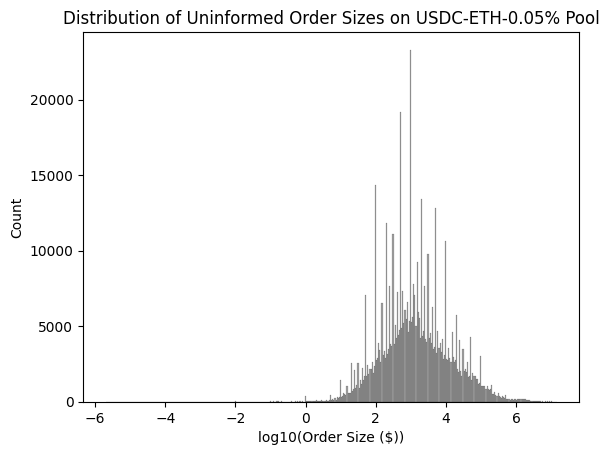

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(uninformed_swap_sizes_sorted_.apply(np.log10), color="grey");
plt.title(f"Distribution of Uninformed Order Sizes on {pool_name_}% Pool");
plt.xlabel("log10(Order Size ($))");

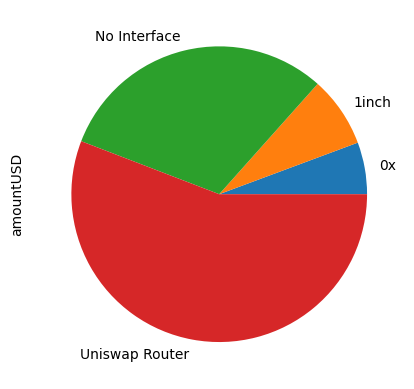

In [10]:
old_to_new = {
    "V3 router 1": "Uniswap Router",
    "V3 router 2": "Uniswap Router",
    "Metamask Router": "MetaMask",
    "1inch Deployer 4": "1inch",
    "1inch V4 Router": "1inch",
    "1inch V5 Router": "1inch",
    "1inch Unlabeled Router": "1inch",
    "0x Router": "0x",
    "0": "No Interface"
}

new_interfaces_ = swap_data_.viaRouter.apply(
    lambda x: old_to_new[x]
)

swap_data_.amountUSD.groupby(new_interfaces_).count().plot.pie();

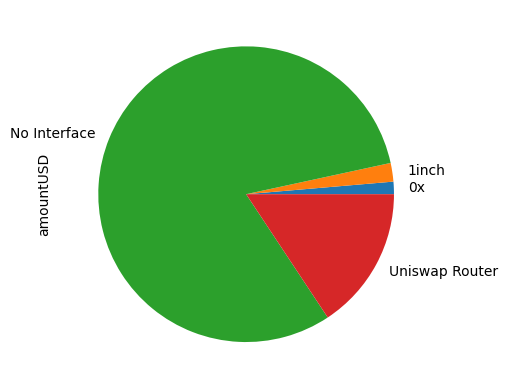

In [11]:
swap_data_.amountUSD.groupby(new_interfaces_).sum().plot.pie();

## What's the deal with routers and aggregators?

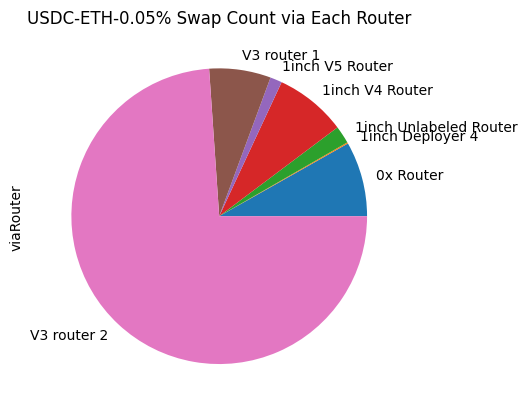

In [12]:
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0").plot.pie()
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0")
plt.title(f"{pool_name_}% Swap Count via Each Router");

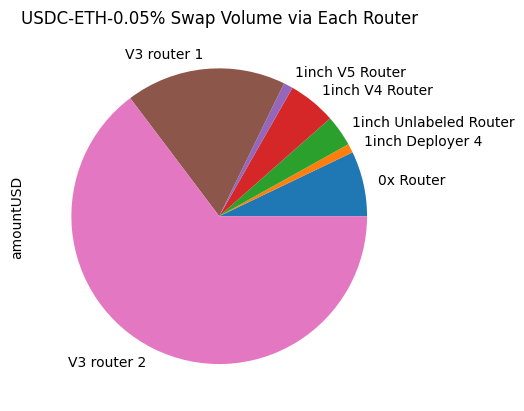

In [13]:
swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0").plot.pie()
# print(100*swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0")/swap_data_.amountUSD.sum())
plt.title(f"{pool_name_}% Swap Volume via Each Router");

In [14]:
total_volume_ = swap_data_.amountUSD.sum()

via_no_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()["0"].sum()

via_uni_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["V3 router 1", "V3 router 2"]
].sum()

via_dex_aggregator_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["0x Router", "1inch Deployer 4", "1inch Unlabeled Router", "1inch V4 Router", "1inch V5 Router"]
].sum()

print(f"Volume that comes from no known router/interface: {100*via_no_router_ / total_volume_:<.2f}%")
print(f"Volume that comes from the Uniswap Router: {100*via_uni_router_ / total_volume_:<.2f}%.")
print(f"Volume that comes from dex aggregators: {100*via_dex_aggregator_ / total_volume_:<.2f}%.")


Volume that comes from no known router/interface: 80.91%
Volume that comes from the Uniswap Router: 15.69%.
Volume that comes from dex aggregators: 3.39%.


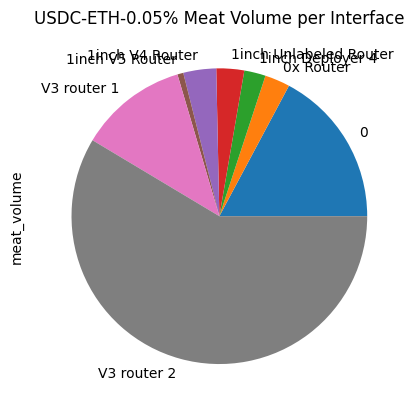

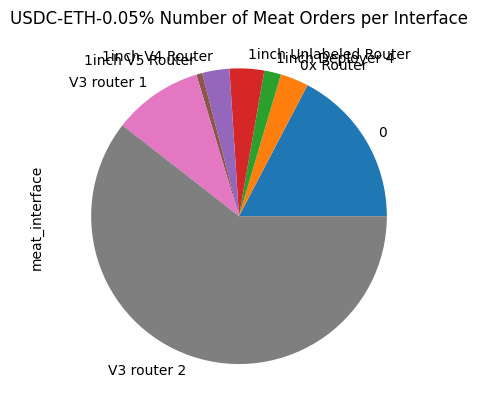

In [15]:
# sandwich volume that comes from each interface
sandwich_data_["meat_interface"] = sandwich_data_.meat_txn.apply(lambda x: swap_txn_interfaces_[x])
sandwich_data_["meat_volume"] = sandwich_data_.meat_amount0.abs()
sandwich_data_.groupby("meat_interface")["meat_volume"].sum().plot.pie()
plt.title(f"{pool_name_}% Meat Volume per Interface")
plt.show();


sandwich_data_.groupby("meat_interface")["meat_interface"].count().plot.pie()
plt.title(f"{pool_name_}% Number of Meat Orders per Interface")
plt.show();


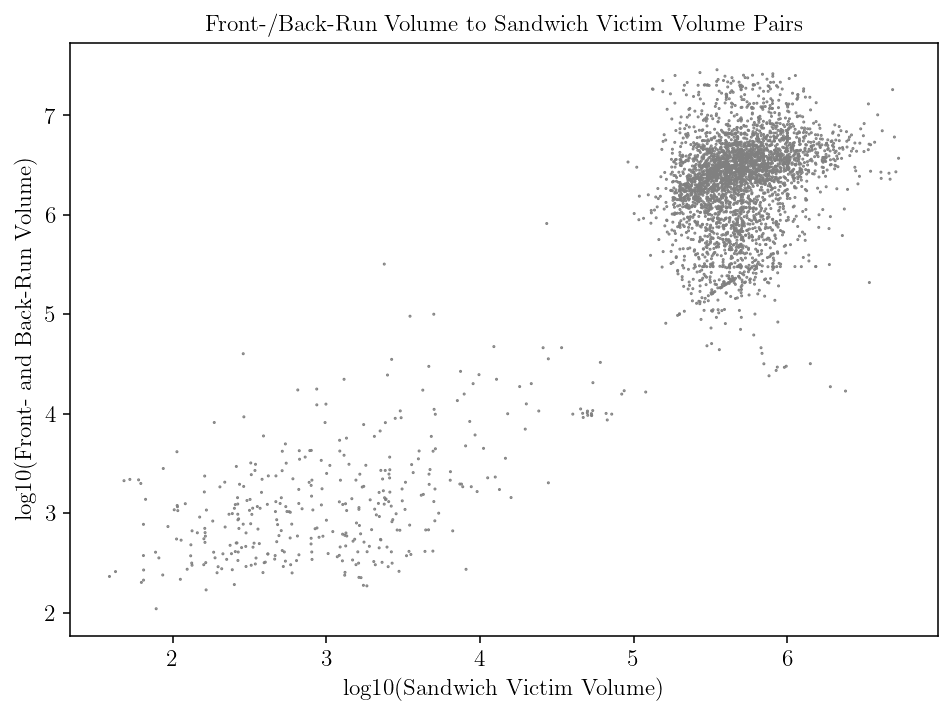

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from latexify import latexify


# df_sorted = sandwich_data_.sort_values("differential")
# df_sorted = sandwich_data_

latexify(fig_width=8, fig_height=5.5)
fig, axs = plt.subplots(1, 1)
axs = [axs]

axs[0].scatter(
    sandwich_data_["meat_volume"].apply(np.log10),
    sandwich_data_["bun_volume"].apply(np.log10),
    color="grey",
    s=[.3]*len(sandwich_data_),
)
axs[0].set_xlabel("log10(Sandwich Victim Volume)")
axs[0].set_ylabel("log10(Front- and Back-Run Volume)")
axs[0].set_title("Front-/Back-Run Volume to Sandwich Victim Volume Pairs")
plt.savefig("/Users/max/Desktop/scatter.pdf")

# largest_n_ = 400
# axs[1].scatter(
#     df_sorted["meat_volume"].iloc[-largest_n_:].apply(np.log10),
#     df_sorted["bun_volume"].iloc[-largest_n_:].apply(np.log10),
#     color="grey",
#     s=[1]*largest_n_,
# )
# axs[1].set_xlabel("log10(Meat Volume)")
# axs[1].set_ylabel("log10(Bun Volume)")
# axs[1].set_title("Bun & Meat Volume Pairs (biggest differential)")


# fig, axs = plt.subplots(1, 2)
# fig.set_size_inches(9, 3)
# fig.set_dpi(150)

# sns.histplot(np.log10(df_sorted["meat_volume"]), color="grey", ax=axs[0])
# axs[1].set_xlabel("log10(Meat Volume)")

# sns.histplot(np.log10(df_sorted["bun_volume"]), color="grey", ax=axs[1])
# axs[1].set_xlabel("log10(Bun Volume)");


In [27]:
k_ = 4.3
meat_lower_ = sandwich_data_[sandwich_data_.bun_volume.apply(np.log10) < k_]
diff_higher_ = df_sorted.iloc[-len(meat_lower_):]

common_indices_ = set(meat_lower_.top_bun_txn.values).intersection(diff_higher_.top_bun_txn.values)
print(f"There is a {100*len(common_indices_)/len(meat_lower_):,.2f}% overlap between the small sandwiches (amount0 < 10^{k_}) and the biggest top-bottom bun differentials.")

for k_ in np.linspace(4.1, 5.1, 30):
# for k_ in np.linspace(-1, 0, 30):
    meat_lower_ = sandwich_data_[sandwich_data_.bun_volume.apply(np.log10) < k_]
    diff_higher_ = df_sorted.iloc[-len(meat_lower_):]

    common_indices_ = set(meat_lower_.top_bun_txn.values).intersection(diff_higher_.top_bun_txn.values)
    print(f"{k_:<.2f} : {100*len(common_indices_)/len(meat_lower_):,.2f}%")


There is a 17.87% overlap between the small sandwiches (amount0 < 10^4.3) and the biggest top-bottom bun differentials.
4.10 : 18.15%
4.13 : 18.10%
4.17 : 18.10%
4.20 : 17.99%
4.24 : 18.02%
4.27 : 17.87%
4.31 : 18.05%
4.34 : 18.00%
4.38 : 17.90%
4.41 : 17.75%
4.44 : 17.65%
4.48 : 17.45%
4.51 : 17.36%
4.55 : 17.26%
4.58 : 17.21%
4.62 : 17.12%
4.65 : 17.07%
4.69 : 17.11%
4.72 : 17.07%
4.76 : 17.07%
4.79 : 17.07%
4.82 : 17.02%
4.86 : 16.98%
4.89 : 17.20%
4.93 : 17.59%
4.96 : 17.54%
5.00 : 17.83%
5.03 : 17.56%
5.07 : 17.25%
5.10 : 17.25%


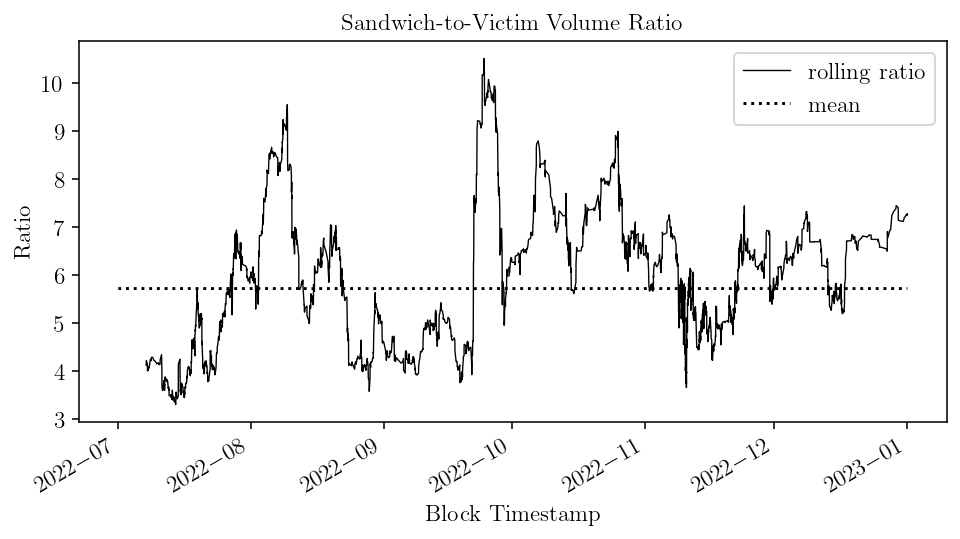

In [48]:
# ratio plot

def calculate_sandwich_volume_multiplier(df, n=100):
    rolling_sums = df[["meat_volume", "bun_volume"]].rolling(n).sum().dropna()
    rolling_sandwich_volume_percentage = rolling_sums["bun_volume"] / rolling_sums["meat_volume"]
    
#     plt.figure(figsize=(5, 2), dpi=200)
    rolling_sandwich_volume_percentage.plot(
        label="rolling ratio",
        linewidth=.7,
        color="black",
    )
    
    overall_ratio = df["bun_volume"].sum() / df["meat_volume"].sum()
    latexify(8, 4.1)
    plt.plot(
        df.index.values,
        [overall_ratio for _ in range(len(df))],
        color="black",
        linestyle="dotted",
        label="mean",
    )
    plt.title("Sandwich-to-Victim Volume Ratio")
    plt.xlabel("Block Timestamp")
    plt.ylabel("Ratio")
    plt.legend();
    plt.savefig("/Users/max/Desktop/rolling.pdf")
    return rolling_sandwich_volume_percentage


totalDf = sandwich_data_.copy()
totalDf.index = pd.to_datetime((totalDf.index*1e9).astype(int))
calculate_sandwich_volume_multiplier(totalDf);

## Extraneous stuff

In [5]:
sandwich_data_

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,meat_interface,top_bun_amount0,meat_amount0,bottom_bun_amount0
blockTimestamp,,,,,,,,,,,,,
1.656648e+09,15054304,0xdb7f72d403272b8bd35b907fe4f1ddd547083ae0d72a...,0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84...,0x2f42d1de920679b42ccc139e4aa749ae06907c505380...,-367.035033,854.878833,-1221.913866,0x000000000035b5e5ad9019092c665357240f594e,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x Router,-4.036198e+05,-5.538277e+05,4.036198e+05
1.656648e+09,15054330,0xc7fa95b84fd61a406b6eab9d69c971c5ed2ea46b99ed...,0xec51b7ce8b3374a91c05e44c45ac7a0ed315cf6a9a53...,0xd13c27950526dead6007187a0fb8dc3e29904f90c1df...,-212.855041,592.394710,-805.249751,0x000000000035b5e5ad9019092c665357240f594e,0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,0,-2.010266e+05,-5.732802e+05,2.010266e+05
1.656661e+09,15055324,0x6c9d3f8b80b0ea9fa1249d34830eba775888e392d362...,0x5ba7dc53dfccb79ba057b3079fdf627497b660a07a07...,0x0f01ba0d36ef0f47c31eee8949f0165d029beae25b13...,-1363.446993,63.896995,-1427.343987,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,-1.128360e+06,-5.000000e+05,1.128360e+06
1.656672e+09,15056164,0xb15c897f4ce0c8d54a03da65a189952c371973806fb1...,0xa7956be29472edde428700cd71e4c54e213c6074ef11...,0x1da2fc44d7b6fadada216a46efe4d7fa5f494f7d669f...,-474.834597,938.619194,-1413.453791,0x000000000035b5e5ad9019092c665357240f594e,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,-1.377812e+06,-3.797504e+05,1.377812e+06
1.656672e+09,15056172,0x97b7d727af914ccafa3783940aab4521f19505c23f3a...,0x271a8616dd76730eb244daa51240bd1e356d841a95b9...,0xb530582bdf133686cb9b6ad8f26e4c6993836bc162be...,-177.543535,66.229998,-243.773532,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,-1.109469e+06,-3.223863e+05,1.109469e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.672479e+09,16303885,0xe2ce45c9b9987d14319f744487645335311bf10cf941...,0xf8ead203750c2cc69e4196235969362f583612927b99...,0xc95d723ffd3e23a2ab1e324fb46e9267a42a2552fc18...,-1450.497291,186.398616,-1636.895907,0x05656db19ec9ff8dfb437475b3d76ca9a29e968f,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,3.633843e+06,1.022590e+06,-3.635294e+06
1.672490e+09,16304806,0x32010a11a87b210c78cf9fa1288108f6e892c2777447...,0xfd1ff2be23ca14d3e23f1dabbd8bbcf11bd8e791dcd6...,0xe41048be80604b07288fd6b1efbe832ff0813d453825...,1.166229,31.231079,-30.064850,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,-1.166002e+03,-4.185742e+02,1.197611e+03
1.672526e+09,16307785,0x3ec41abe2d22b4c746bce62f9f889fbebd932c3d2237...,0x2da2a3fd7132b0bf20be7fd5adbcc5ec51e433e8f58c...,0xbbe6e9d5b0e98985ee73df2f04fe3dd0a753d9749938...,-122.781845,24.233749,-147.015594,0x00000000032962b51589768828ad878876299e14,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,V3 router 2,-2.849804e+06,-6.541610e+05,2.849804e+06


In [ ]:
def tst():
    

In [11]:
sandwich_data_.sandwich_revenue.sort_values().head(20)

blockTimestamp
1.668020e+09   -83532.062883
1.657892e+09   -45642.650955
1.658332e+09   -39882.298435
1.659489e+09   -38025.887184
1.662991e+09   -37331.777374
1.669145e+09   -35752.839534
1.672145e+09   -33973.371343
1.668036e+09   -31470.764118
1.661824e+09   -30248.949035
1.658928e+09   -29176.954808
1.668608e+09   -28575.377983
1.659576e+09   -28130.853403
1.669246e+09   -26544.437591
1.668699e+09   -25869.834991
1.668568e+09   -25581.332971
1.669944e+09   -24952.664590
1.668014e+09   -23897.859495
1.657528e+09   -23706.046814
1.664378e+09   -23038.433764
1.664024e+09   -22966.282098
Name: sandwich_revenue, dtype: float64